In [ ]:
import numpy as np
import pandas as pd
import hiplot as hip
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'hiplot'

In [ ]:

data = [{'data_name': "Tox21", 'data_count': 7831, 'lr':9e-6, 'total number update': 25000, "warmup update": 3000, 'loss': 0.822},
        {'data_name': "Tox21", 'data_count': 7831, 'lr':5e-8, 'total number update': 25000, "warmup update": 3000, 'loss': 0.499},
        {'data_name': "Tox21", 'data_count': 7831, 'lr':3e-7, 'total number update': 25000, "warmup update": 3000, 'loss': 0.5}]


In [ ]:
sider = pd.read_csv("/home/gayane/BartLM/Bart/chemical/evaluation_data/sider/sider/results.csv", sep=',', on_bad_lines='skip')
sider_list = sider.to_dict('records')

In [ ]:
# sider.drop("Unnamed: 1")
# sider.columns

In [ ]:
# exp = hip.Experiment.from_iterable(sider_list)

# exp.colormap = "schemeSpectral"
# exp.display(store_state_key="cell1")

In [ ]:
siderSWA = pd.read_csv("/home/gayane/BartLM/Bart/chemical/evaluation_data/sider/sider/SWA_results.csv", sep=',', on_bad_lines='skip')
siderSWA_list = siderSWA.to_dict('records')

In [ ]:
# exp = hip.Experiment.from_iterable(siderSWA_list)

# exp.colormap = "schemeSpectral"
# exp.display(store_state_key="cell1")

In [ ]:

data_name = [      "PCBA", "MUV", "HIV", "BACE", "BBBP", "Tox21", "ToxCast", "SIDER", "CleanTox"]
data_count = [      437929, 93087, 41127, 1513,   2039,   7831,    8575,      1427,    1478]
data_label_count = [128,    17,    1,      1,      1,     12,      617,       27,      2]
diff_score = [(0.878+1), (0.886+1), (0.053+1), (0.587+1), (0+0.1), (0.035+1), (0.737+1), (0.171+1), (-0.036+0.5)]

Text(0.5, 0, 'Logarithm of dataset lenght count')

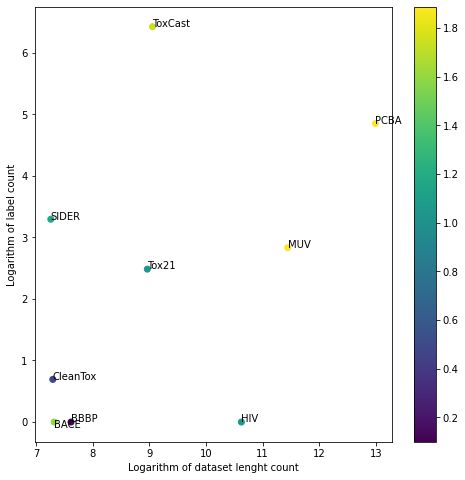

In [ ]:
N = len(data_count)
# cmap = plt.get_cmap('jet')
# norm = plt.Normalize(0, 400)

# color = cmap(norm(200.))
# colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2 

# plt.scatter(data_count, data_label_count, s=50, cmap='viridis')
# plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(np.log(data_count), np.log(data_label_count), c=diff_score)
for i, txt in enumerate(data_name):
    ax.annotate(txt, (np.log(data_count[i]), np.log(data_label_count[i])- (0.1 if txt=='BACE' else 0)))
# plt.title("title")
plt.colorbar()
plt.ylabel("Logarithm of label count")
plt.xlabel("Logarithm of dataset lenght count")

In [ ]:
import os
directory_list = list()
for root, dirs, files in os.walk("/mnt/good/gayane/data/chkpt", topdown=False):
    for name in dirs:
        if "BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757" in name and "normal" in name and "r3f" in name: 
            print(name)

            path = os.path.join(root, name)
            print(path)
            os.system(f"rm -rf {path}")
            # os.system(f"rm -rf {path}/checkpoint1* {path}/checkpoint2* {path}/checkpoint3* {path}/checkpoint4* {path}/checkpoint5* {path}/checkpoint6* {path}/checkpoint7* {path}/checkpoint8* {path}/checkpoint9*  {path}/checkpoint.best_loss*")
# rm -rf checkpoint1* checkpoint2* checkpoint3* checkpoint4* checkpoint5* checkpoint6* checkpoint7* checkpoint8* checkpoint9*  checkpoint.best_loss*")


BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_5.0
/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_5.0
BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.5
/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.5
BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.1
/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.1
BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_1.0
/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_1.0


In [ ]:
import os
directory_list = list()
for root, dirs, files in os.walk("/mnt/good/gayane/data/chkpt", topdown=False):
    for name in dirs:
        path = os.path.join(root, name)

        os.system(f"mv {path}/*.log /home/gayane/BartLM/fairseq")


In [ ]:
import os
directory_list = list()
for root, dirs, files in os.walk("/mnt/good/gayane/data/chkpt", topdown=False):
    for name in dirs:
        # if "Tox21" not in name: 
        #     # print("skip")
        #     continue


        path = os.path.join(root, name)
        os.system(f"rm -rf {path}/checkpoint_last* {path}/checkpoint.best_loss*")


In [ ]:
import numpy as np
from git import typ
import pandas as pd 
from rdkit import Chem
from sklearn.model_selection import train_test_split


dataset_name = "Ames"
smiles_col_name = "Canonical_Smiles"
label_col_name = "Activity"

path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/{dataset_name}/"

print(path)
print (f"{path}{dataset_name}.csv")
df = pd.read_csv(f"{path}{dataset_name}.csv")
d = {"SMILES": df[smiles_col_name], "Classification": df[label_col_name] }
df = pd.DataFrame(d) 
print(df.columns, df.shape)
print(df.head())

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/
/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/Ames.csv
Index(['SMILES', 'Classification'], dtype='object') (6512, 2)
                                              SMILES  Classification
0  O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...               0
1                              NNC(=O)CNC(=O)\C=N\#N               1
2                           O=C1NC(=O)\C(=N/#N)\C=N1               1
3                               NC(=O)CNC(=O)\C=N\#N               1
4             CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O               1


In [ ]:
a = Chem.MolFromSmiles(df.values[1][0])

RDKit ERROR: [16:17:39] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
RDKit ERROR: [16:17:39] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'


In [ ]:
print(a)

None


In [ ]:
# z = 0
# heavy_at = ["Ti", "V", "Cr", "Mn", "Fe", "Co", 
# "Ni",  "Cu", "Zn", "Ga", "Ge", "As", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", 
# "Cd", "In", "Sn", "Te", "Lu", "Hf", "Ta", "W", "Re","Os", "Ir", "Pt", "Au", "Hg", 
# "Tl", "Pb", "Bi", "Po", "At", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", 
# "Dy", "Ho", "Tm", "Yb", "Pa", "Ac", "Th", "U", "Np", "Pu", "Am", "Bk", "Cm", "Cf", "Es", 
# "Fm", "No", "Ra", "Lr", "Rf", "Db", "Sg", "Bh", "Hs", "Mt"]
# smiles_heavy = []
# heavy = []
# for i in df.values[:,0]:
#     for h in heavy_at:
#         if i in h or i.lower().replace("cl","").count("c")<3:
#             smiles_heavy.append(i)
#             heavy.append(h)
#             # print(h, i)
#             break
# print(len(set(smiles_heavy)))
# print(heavy)

   


In [ ]:
# m = Chem.MolFromSmiles("O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7ccccc7C(=O)c6c8[nH]c9c%10C(=O)c%11ccccc%11C(=O)c%10ccc9c8c45
# NNC(=O)CNC(=O)\C=N\#N")


In [ ]:
df.values[:,0]

array(['O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7ccccc7C(=O)c6c8[nH]c9c%10C(=O)c%11ccccc%11C(=O)c%10ccc9c8c45',
       'NNC(=O)CNC(=O)\\C=N\\#N', 'O=C1NC(=O)\\C(=N/#N)\\C=N1', ...,
       'COC(=O)Nc1nc2ccccc2[nH]1', 'ClCc1cccc2c3cccc4cccc(c12)c34',
       'CCCN(CCC)N=O'], dtype=object)

In [ ]:
import numpy as np
from git import typ
import pandas as pd 
from rdkit import Chem
from sklearn.model_selection import train_test_split


dataset_name = "Ames"
smiles_col_name = "Canonical_Smiles"
label_col_name = "Activity"

path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/{dataset_name}/"

print(path)
print (f"{path}valid_{dataset_name}.csv")
df = pd.read_csv(f"{path}valid_{dataset_name}.csv")
print()
d = {"SMILES": df[smiles_col_name], "Classification": df[label_col_name] }
df = pd.DataFrame(d) 
print(df.columns, df.shape)
print(df)

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/
/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/valid_Ames.csv

Index(['SMILES', 'Classification'], dtype='object') (651, 2)
                                                SMILES  Classification
0                                          CCCC(=C)C=O               1
1                            FC1=CN(C2CCCO2)C(=O)NC1=O               0
2                           CC(=O)OCc1cocc2c(C=O)ccc12               1
3                                         OC(=O)C(=O)O               0
4    CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...               0
..                                                 ...             ...
646                 CC(=O)ON(C(=O)C)c1ccc(cc1)c2ccccc2               1
647            CCN1C=C(C(=O)O)C(=O)c2cnc(nc12)N3CCNCC3               1
648                           Fc1ccc(F)c2c1ccc3cccnc23               1
649                                           OCCN1CC1              

In [ ]:
dataset_name = "japan"
smiles_col_name = "SMILES"
label_col_name = "Classification"
path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/"

print (f"{path}{dataset_name}.csv")
df_ = pd.read_csv(f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/japan/japan_.csv")
d_ = {"SMILES": df_[smiles_col_name], "Classification": df_[label_col_name] }
df_ = pd.DataFrame(d_) 
print(df_.columns, df.shape)
print(df_)

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/japan/japan.csv
Index(['SMILES', 'Classification'], dtype='object') (651, 2)
                                                SMILES  Classification
0    CC(=O)NC1=C(C=CC(=C1)N(CCOC(=O)C)CCOC(=O)C)N=N...               1
1    C1=CC=C(C=C1)CCN(CCC#N)C2=CC=C(C=C2)N=NC3=C(C=...               1
2    [O-][N+](=O)c2ccc(/N=N/c1ccc(N(CCOC(=O)C)CCC#N...               1
3                                      COC(=O)C(CCl)Cl               1
4                              COC(=O)C(CSC(=N)N)Cl.Cl               1
..                                                 ...             ...
667                                      COC(C(=O)OC)O               1
668   CCOC(=O)C1=C(SC(=C1C)C2=CC=C(C=C2)[N+](=O)[O-])N               1
669                CC(C)(C(=O)C1=CC=C(C=C1)Cl)N2CCOCC2               1
670                        CS(=O)(=O)OCC1COS(=O)(=O)O1               1
671                          C1[C@H](O1)COCC2=CC=CC=C2               1

[672 row

In [ ]:
df

,SMILES,Classification
0,CCCC(=C)C=O,1
1,FC1=CN(C2CCCO2)C(=O)NC1=O,0
2,CC(=O)OCc1cocc2c(C=O)ccc12,1
3,OC(=O)C(=O)O,0
4,CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...,0
...,...,...
646,CC(=O)ON(C(=O)C)c1ccc(cc1)c2ccccc2,1
647,CCN1C=C(C(=O)O)C(=O)c2cnc(nc12)N3CCNCC3,1
648,Fc1ccc(F)c2c1ccc3cccnc23,1
649,OCCN1CC1,1


In [ ]:
df_diff = pd.concat([df['SMILES'],df_['SMILES']]).drop_duplicates(keep=False)
df_diff

0                                            CCCC(=C)C=O
1                              FC1=CN(C2CCCO2)C(=O)NC1=O
2                             CC(=O)OCc1cocc2c(C=O)ccc12
3                                           OC(=O)C(=O)O
4      CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...
                             ...                        
667                                        COC(C(=O)OC)O
668     CCOC(=O)C1=C(SC(=C1C)C2=CC=C(C=C2)[N+](=O)[O-])N
669                  CC(C)(C(=O)C1=CC=C(C=C1)Cl)N2CCOCC2
670                          CS(=O)(=O)OCC1COS(=O)(=O)O1
671                            C1[C@H](O1)COCC2=CC=CC=C2
Name: SMILES, Length: 1323, dtype: object

In [ ]:
pd.concat([df['SMILES'],df_['SMILES']])

0                                            CCCC(=C)C=O
1                              FC1=CN(C2CCCO2)C(=O)NC1=O
2                             CC(=O)OCc1cocc2c(C=O)ccc12
3                                           OC(=O)C(=O)O
4      CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...
                             ...                        
667                                        COC(C(=O)OC)O
668     CCOC(=O)C1=C(SC(=C1C)C2=CC=C(C=C2)[N+](=O)[O-])N
669                  CC(C)(C(=O)C1=CC=C(C=C1)Cl)N2CCOCC2
670                          CS(=O)(=O)OCC1COS(=O)(=O)O1
671                            C1[C@H](O1)COCC2=CC=CC=C2
Name: SMILES, Length: 1323, dtype: object

In [ ]:
from toxometris.tools import molecule
import numpy as np
from git import typ
import pandas as pd 
from rdkit import Chem
from sklearn.model_selection import train_test_split


dataset_name = "Ames"
smiles_col_name = "Canonical_Smiles"
label_col_name = "Activity"

path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/{dataset_name}/"

print(path)
print (f"{path}train_{dataset_name}.csv")
df = pd.read_csv(f"{path}train_{dataset_name}.csv")
print()
d = {"SMILES": df[smiles_col_name], "Classification": df[label_col_name] }
df = pd.DataFrame(d) 
print(df.columns, df.shape)
print(df)

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/
/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/train_Ames.csv

Index(['SMILES', 'Classification'], dtype='object') (5209, 2)
                                        SMILES  Classification
0          Oc1ccc2C(=O)c3cccc4c(O)ccc(c2c1)c34               1
1        Cc1ccc2nc3c4C=CC(O)C(O)c4ccc3c(C)c2c1               1
2                                    CC(=O)C=O               1
3                  COC(=O)C1=C(C)C(OC1=O)C(C)C               1
4                     OC(=O)CCc1c[nH]c2ccccc12               0
...                                        ...             ...
5204                  OC(=O)CCCc1ccc(NCCCl)cc1               1
5205          OC(=O)\C(=C(\C(Cl)Cl)/C(=O)O)\Cl               1
5206                                  Cc1ccsc1               0
5207     CN1CCN(CC1)C2=Nc3cc(Cl)ccc3Nc4ccccc24               0
5208  CC#CC(OC(=O)NC1CCCCC1)(c2ccccc2)c3ccccc3               1

[5209 rows x 2 colum

In [ ]:
# Ames_df = molecule.MoleculeHelper.add_molecular_property_to_df(df, 'SMILES', 'InChIKey')

In [ ]:
test_df

,SMILES,Classification,InChIKey
0,CCCC(=C)C=O,1,RTTWLTLNKLTUJR-UHFFFAOYSA-N
1,FC1=CN(C2CCCO2)C(=O)NC1=O,0,WFWLQNSHRPWKFK-UHFFFAOYSA-N
2,CC(=O)OCc1cocc2c(C=O)ccc12,1,QIUOVIRIFZOCLL-UHFFFAOYSA-N
3,OC(=O)C(=O)O,0,MUBZPKHOEPUJKR-UHFFFAOYSA-N
4,CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...,0,LWQQLNNNIPYSNX-UHFFFAOYSA-N
...,...,...,...
646,CC(=O)ON(C(=O)C)c1ccc(cc1)c2ccccc2,1,UJDATCBZIHYYMW-UHFFFAOYSA-N
647,CCN1C=C(C(=O)O)C(=O)c2cnc(nc12)N3CCNCC3,1,JOHZPMXAZQZXHR-UHFFFAOYSA-N
648,Fc1ccc(F)c2c1ccc3cccnc23,1,GOCFEAGEPBLXRZ-UHFFFAOYSA-N
649,OCCN1CC1,1,VYONOYYDEFODAJ-UHFFFAOYSA-N


In [ ]:
dataset_name = "japan"
smiles_col_name = "SMILES"
label_col_name = "Classification"
path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/"

print (f"{path}{dataset_name}.csv")
df_ = pd.read_csv(f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/japan/japan_.csv")
# d_ = {"SMILES": df_[smiles_col_name], "Classification": df_[label_col_name] }
# df_ = pd.DataFrame(df_) 
# print(df_.columns, df.shape)
# print(df_)

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/japan/japan.csv


In [ ]:
japan_df = molecule.MoleculeHelper.add_molecular_property_to_df(df_, 'SMILES', 'InChIKey')

100%|██████████| 672/672 [00:00<00:00, 1479.80it/s]

Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


In [ ]:
len(set(japan_df['InChIKey']))

670

In [ ]:
ames_unique = []
japan_unique = []
am = set(Ames_df['InChIKey'])
jap = set(japan_df['InChIKey'])
ames_interseq = [i for i in Ames_df['InChIKey'] if i in jap]
japan_interseq = [i for i in japan_df['InChIKey'] if i in am]


In [ ]:
ames_interseq, japan_interseq

([nan,
  'LTNYDSMDSLOMSM-UHFFFAOYSA-N',
  'TUIUTESNLKHOHQ-UHFFFAOYSA-N',
  'HSTOKWSFWGCZMH-UHFFFAOYSA-N'],
 ['HSTOKWSFWGCZMH-UHFFFAOYSA-N',
  'LTNYDSMDSLOMSM-UHFFFAOYSA-N',
  'TUIUTESNLKHOHQ-UHFFFAOYSA-N',
  nan])

In [ ]:
dataset_name = "japan"
smiles_col_name = "SMILES"
label_col_name = "Classification"
path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/snyder_negatives_451/snyder_negatives_451/snyder_negatives_451.csv"

print (f"{path}")
df_ = pd.read_csv(f"{path}")

synder_df = molecule.MoleculeHelper.add_molecular_property_to_df(df_, 'SMILES', 'InChIKey')

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/snyder_negatives_451/snyder_negatives_451/snyder_negatives_451.csv


  0%|          | 0/451 [00:00<?, ?it/s]RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
 

In [ ]:
am = set(Ames_df['InChIKey'])
jap = set(synder_df['InChIKey'])
ames_interseq = [i for i in Ames_df['InChIKey'] if i in jap]
synder_interseq = [i for i in synder_df['InChIKey'] if i in am]

In [ ]:
synder_interseq, ames_interseq

(['GOEMGAFJFRBGGG-UHFFFAOYSA-N',
  'OFCNXPDARWKPPY-UHFFFAOYSA-N',
  'PAZJSJFMUHDSTF-UHFFFAOYSA-N',
  'UUVWYPNAQBNQJQ-UHFFFAOYSA-N',
  'KBOPZPXVLCULAV-UHFFFAOYSA-N',
  'KRMDCWKBEZIMAB-UHFFFAOYSA-N',
  'SGRYPYWGNKJSDL-UHFFFAOYSA-N',
  'METKIMKYRPQLGS-UHFFFAOYSA-N',
  'XUKUURHRXDUEBC-UHFFFAOYSA-N',
  'OMPJBNCRMGITSC-UHFFFAOYSA-N',
  'UREBDLICKHMUKA-UHFFFAOYSA-N',
  'RYYVLZVUVIJVGH-UHFFFAOYSA-N',
  'OFZCIYFFPZCNJE-UHFFFAOYSA-N',
  'WIIZWVCIJKGZOK-UHFFFAOYSA-N',
  'WDFKMLRRRCGAKS-UHFFFAOYSA-N',
  'KPSRODZRAIWAKH-UHFFFAOYSA-N',
  'CXOXHMZGEKVPMT-UHFFFAOYSA-N',
  'KNHUKKLJHYUCFP-UHFFFAOYSA-N',
  'GJSURZIOUXUGAL-UHFFFAOYSA-N',
  'OROGSEYTTFOCAN-UHFFFAOYSA-N',
  'PMATZTZNYRCHOR-UHFFFAOYSA-N',
  'JJCFRYNCJDLXIK-UHFFFAOYSA-N',
  'MQJKPEGWNLWLTK-UHFFFAOYSA-N',
  'UREBDLICKHMUKA-UHFFFAOYSA-N',
  'AAOVKJBEBIDNHE-UHFFFAOYSA-N',
  'DCOPUUMXTXDBNB-UHFFFAOYSA-N',
  'ZZVUWRFHKOJYTH-UHFFFAOYSA-N',
  'AUZONCFQVSMFAP-UHFFFAOYSA-N',
  'HCFDWZZGGLSKEP-UHFFFAOYSA-N',
  'ULGZDMOVFRHVEP-UHFFFAOYSA-N',
  'BFPYWID

In [ ]:
def generate_scaff(smiles: str, include_chirality: bool = False) -> str:
  """Compute the Bemis-Murcko scaffold for a SMILES string.

  Bemis-Murcko scaffolds are described in DOI: 10.1021/jm9602928.
  They are essentially that part of the molecule consisting of
  rings and the linker atoms between them.

  Paramters
  ---------
  smiles: str
    SMILES
  include_chirality: bool, default False
    Whether to include chirality in scaffolds or not.

  Returns
  -------
  str
    The MurckScaffold SMILES from the original SMILES

  References
  ----------
  .. [1] Bemis, Guy W., and Mark A. Murcko. "The properties of known drugs.
     1. Molecular frameworks." Journal of medicinal chemistry 39.15 (1996): 2887-2893.

  Note
  ----
  This function requires RDKit to be installed.
  """
  try:
    from rdkit import Chem
    from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
  except ModuleNotFoundError:
    raise ImportError("This function requires RDKit to be installed.")

  mol = Chem.MolFromSmiles(smiles)
  scaffold = MurckoScaffoldSmiles(mol=mol, includeChirality=include_chirality)
  return scaffold

# Caffeine

In [ ]:
generate_scaff("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")

'O=c1[nH]c(=O)c2[nH]cnc2[nH]1'

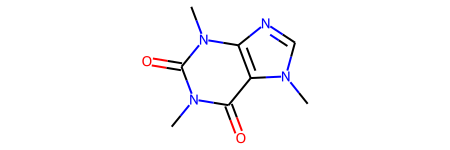

In [ ]:
Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

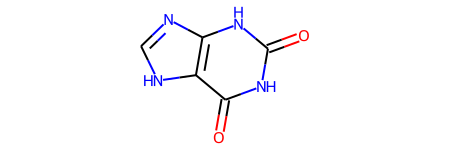

In [ ]:
Chem.MolFromSmiles("O=c1[nH]c(=O)c2[nH]cnc2[nH]1")

# Adenine

In [ ]:
generate_scaff("NC1=NC=NC2=C1N=CN2 Nc1c2ncNc2ncn1")

'c1ncc2nc[nH]c2n1'

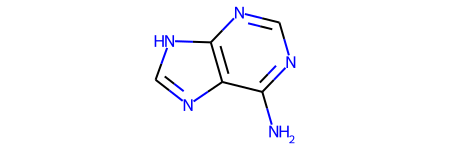

In [ ]:
Chem.MolFromSmiles("NC1=NC=NC2=C1N=CN2 Nc1c2ncNc2ncn1")

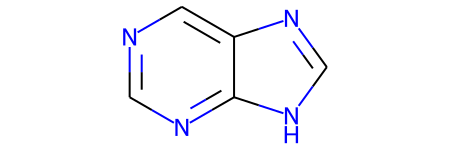

In [ ]:
Chem.MolFromSmiles("c1ncc2nc[nH]c2n1")

# Guanine

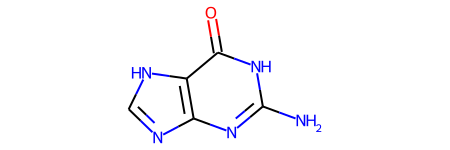

In [ ]:
Chem.MolFromSmiles("C1=NC2=C(N1)C(=O)NC(=N2)N")

In [ ]:
# generate_scaff("C1=NC2=C(N1)C(=O)NC(=N2)N")

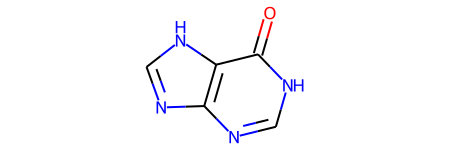

In [ ]:
Chem.MolFromSmiles("O=c1[nH]cnc2nc[nH]c12")

In [3]:
from rdkit import Chem
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
import rdkit.Chem.Scaffolds.rdScaffoldNetwork
from rdkit.Chem.Scaffolds.rdScaffoldNetwork import BRICSScaffoldParams
from fairseq.data.data_utils import load_indexed_dataset
# from sklearn.linear_model import ridge_regression
from fairseq.models.bart import BARTModel
from fairseq.data import Dictionary
import matplotlib.pyplot as plt 
import torch.nn.functional as F 
from tqdm import tqdm
import pandas as pd
import numpy as np
import torch
import umap

import json

In [4]:
dataset_name = "BACE"

def generateMurcoScaffold(dataset_name):

        path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/{dataset_name}/"
        train_df = pd.read_csv(f"{path}train_{dataset_name}.csv")
        valid_df = pd.read_csv(f"{path}valid_{dataset_name}.csv")
        test_df = pd.read_csv(f"{path}test_{dataset_name}.csv")

        train_scaff = []
        valid_scaff = []
        train_scaff = []

        include_chirality = False

        for i in range(len(train_df)):
                mol = Chem.MolFromSmiles(train_df['ids'][i])
                train_scaff.append(MurckoScaffoldSmiles(mol=mol, includeChirality=include_chirality))
        train_df["MurckoScaffold"] = train_scaff



        for i in range(len(valid_df)):
            mol = Chem.MolFromSmiles(valid_df['ids'][i])
            valid_scaff.append(MurckoScaffoldSmiles(mol=mol, includeChirality=include_chirality))
        valid_df["MurckoScaffold"] = valid_scaff
        print(valid_df)
        #     print(valid_df)
        return train_df, valid_df


In [5]:
def plot_mlot(X, Y, dataset, subset, pooling, umap_fit_policy):
    log_save_dir = Path(f"./umap-multi-logs/{pooling}/{umap_fit_policy}")
    log_save_dir.mkdir(parents=True, exist_ok=True)

    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f"UMAP projection of {subset}", fontsize=24)
    plt.legend(fontsize=14, markerscale=2, facecolor='w')

    n_neighbors = [2, 10, 50, 100]
    min_dists = [0.0, 0.25, 0.5, 0.99]
    for n_neighbor in n_neighbors:
        for min_dist in min_dists:
            logging.info(f"--------------------- {subset}.{n_neighbor}.{min_dist} ---------------------")
            reducer = umap.UMAP(n_neighbors=n_neighbor, min_dist=min_dist)

            if umap_fit_policy == "grouped":
                embedding = reducer.fit_transform(X)
                data = {
                    "x": embedding[:, 0].tolist(),
                    "y": embedding[:, 1].tolist(),
                    "label": Y.squeeze().tolist(),
                    "dataset": dataset
                }
                df = pd.DataFrame(data=data)

                sns.scatterplot(data=df, x="x", y="y", hue="dataset", style="label")
                plt.savefig(log_save_dir.joinpath(f"{subset}.{n_neighbor}.{min_dist}.png"))
                plt.clf()
            elif umap_fit_policy == "seperate":
                embeddings = []
                curr_da = dataset[0]
                pivot = 0
                for i in range(len(dataset)):
                    if dataset[i] != curr_da:
                        sub_X = X[pivot:i, :]
                        embedding = reducer.fit_transform(sub_X)
                        embeddings.append(embedding)
                        curr_da = dataset[i]
                        pivot = i
                    if i == len(dataset) - 1:
                        sub_X = X[pivot:, :]
                        embedding = reducer.fit_transform(sub_X)
                        embeddings.append(embedding)
                embedding = np.concatenate(embeddings)
                data = {
                    "x": embedding[:, 0].tolist(),
                    "y": embedding[:, 1].tolist(),
                    "label": Y.squeeze().tolist(),
                    "dataset": dataset
                }
                df = pd.DataFrame(data=data)

                sns.scatterplot(data=df, x="x", y="y", hue="dataset", style="label")
                plt.savefig(log_save_dir.joinpath(f"{subset}.{n_neighbor}.{min_dist}.png"))
                plt.clf()
            else:
                raise NotImplementedError(f"umap_fit_policy method {umap_fit_policy}")


In [6]:
dataset_name = 'BACE'
# dataset = dataset_name if dataset_name in set(["BBBP", "BACE", "HIV"]) else f"{dataset_name}_{args.subtask}"
dataset = dataset_name

store_path = "/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data"
model = f"{store_path}/{dataset}/processed"

with open('/home/gayane/BartLM/captum/fairseq/scripts/datasets.json') as f:
    datasets_json = json.load(f)
dataset_js = datasets_json[dataset]
task_type = dataset_js['type']

chkpt_path = "/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_5e-6_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.1/checkpoint_best.pt"

# chkpt_path = f"/mnt/good/gayane/data/chkpt/{dataset}_bs_16_lr_{lr}_totalNum_{totNumUpdate}_warmup_{warmup}/checkpoint_last.pt"
print(chkpt_path)  # BACE_bs_16_lr_3e-5_totalNum_1135_warmup_181/ in test 
bart = BARTModel.from_pretrained(model,  checkpoint_file = chkpt_path, 
                                 bpe="sentencepiece",
                                 sentencepiece_model="/home/gayane/BartLM/Bart/chemical/tokenizer/chem.model")
bart.eval()
bart.cuda(device=1)



2022-06-22 12:11:48 | INFO | fairseq.file_utils | loading archive file /home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/BACE/processed


/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_5e-6_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.1/checkpoint_best.pt


2022-06-22 12:14:21 | INFO | fairseq.tasks.sentence_prediction | [input] dictionary: 1026 types
2022-06-22 12:14:21 | INFO | fairseq.tasks.sentence_prediction | [label] dictionary: 9 types
2022-06-22 12:14:26 | INFO | fairseq.models.bart.model | Registering classification head: sentence_classification_head


BARTHubInterface(
  (models): ModuleList(
    (0): BARTModel(
      (encoder): TransformerEncoderBase(
        (dropout_module): FairseqDropout()
        (embed_tokens): Embedding(1026, 1024, padding_idx=1)
        (embed_positions): LearnedPositionalEmbedding(130, 1024, padding_idx=1)
        (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (layers): ModuleList(
          (0): TransformerEncoderLayerBase(
            (self_attn): MultiheadAttention(
              (dropout_module): FairseqDropout()
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (dropout_module): Fairse

In [7]:
train_df, valid_df = generateMurcoScaffold("BACE")


     Unnamed: 0    y                                                ids  \
0             0  0.0  S1(=O)(=O)CC(Cc2cc(F)c3NCC4(CCC4)c3c2)C(O)C([N...   
1             1  0.0  Fc1cc(cc(F)c1)CC(NC(=O)C)C(O)C[NH2+]C1(CCCCC1)...   
2             2  0.0   Clc1ccc(nc1)C(=O)Nc1cc(ccc1)C1(N=C(N)c2c1cccc2)C   
3             3  0.0  S1(=O)(=O)N(C2C=C(C=C3N(CC[NH+](C23)CC1)CC)C(=...   
4             4  0.0    s1nc(cc1)-c1cc2c(OC(CC23N=C(N)N(C)C3=O)(C)C)cc1   
..          ...  ...                                                ...   
146         146  1.0  S1(=O)(=O)N(c2cc(cc3n(cc(CC1)c23)CC)C(=O)NC(Cc...   
147         147  1.0  Clc1ccc(nc1)C(=O)Nc1cc(C2(N=C(N)N(CC2)C)C)c(F)cc1   
148         148  1.0  S(=O)(=O)(N(c1cc(cc(c1)/C(=N\OCc1ccccc1)/C)C(=...   
149         149  1.0  S1(=O)(=O)CC(Cc2cc(OC3CCC3)c(N)c(F)c2)C(O)C([N...   
150         150  1.0  O(C)c1cc(ccc1)C[NH2+]CC(O)C(NC(=O)C(N1CCC(NC(=...   

                                        MurckoScaffold  
0    O=S1(=O)CC(Cc2ccc3c(c2)C2(CCC2)CN3)CC

In [8]:
len(set(train_df['MurckoScaffold'].values)), len(train_df)

(368, 1210)

In [9]:
if len(dataset_js["class_index"])>1:
    test_label_path = list()
    for i in range(len(dataset_js["class_index"])):
        test_label_path.append(f"{store_path}/{dataset}_{i}/processed/label/train")

else:
    test_label_path = f"{store_path}/{dataset}/processed/label/train"

if task_type == 'classification':
    target_dict = Dictionary.load(f"{store_path}/{dataset}/processed/label/dict.txt")
    targets = list(load_indexed_dataset(test_label_path, target_dict))
else:
    with open(f'{test_label_path}.label') as f:
        lines = f.readlines()
        targets = [float(x.strip()) for x in lines]

input_dict = Dictionary.load(f"{store_path}/{dataset}/processed/input0/dict.txt")
smiles = list(load_indexed_dataset(
f"{store_path}/{dataset}/processed/input0/train", input_dict))
print(smiles[0])

y_pred = []
y = []
sm = []
smi = []

for i, (smile, target) in tqdm(list(enumerate(zip(smiles, targets)))):
    smile = torch.cat((torch.cat((torch.tensor([0]), smile[:126])), torch.tensor([2]))) 
    # print(smile.size(), smile.size(dim=0))
    for i in range(smile.size(dim=0),128):
        smile = torch.cat((smile, torch.tensor([2])),0)
        
    if task_type =="classification":
        output = bart.predict('sentence_classification_head', smile)
        target = target[0].item()
        y_pred.append(output[0][1].exp().item())
        y.append(target - 4)
        smi.append(smile)
        sm.append(bart.decode(smile))
        
    elif task_type == "regression":
        output = bart.predict('sentence_classification_head', smile, return_logits=True)
        y_pred.append(output[0][0].item())
        y.append(target)


2022-06-22 12:14:30 | INFO | fairseq.data.data_utils | loaded 1,210 examples from: /home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/BACE/processed/label/train
2022-06-22 12:14:30 | INFO | fairseq.data.data_utils | loaded 1,210 examples from: /home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/BACE/processed/input0/train


tensor([222,   9,   6,  25,   7,  19,   6,   4,  50,   4,   4,   4,   4,  22,
         32,   4,  77,  14,  29,   4,   7,  14,   5,  14,   7,   4,   5,   4,
         79,   8,   5,   9,   6,  25,   7,   8,   4,   7,  22,   5,  22,   5,
         19,   6,   2])


100%|██████████| 1210/1210 [00:38<00:00, 31.50it/s]


In [10]:
# smi = [sm.tolist() for sm in smi]
# smi

In [11]:
def draw_umap(data=smi, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)

In [25]:
# def plt_mlt(smi, df, dataset_name, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):

#     scaffold_list = list(set(df['MurckoScaffold'].values))
#     smi = [sm.tolist() for sm in smi]
        
#     fit = umap.UMAP(
#         n_neighbors=n_neighbors,
#         min_dist=min_dist,
#         n_components=n_components,
#         metric=metric)
#     u = fit.fit_transform(smi)
#     return u


# task_type == "classification"

# u = plt_mlt(smi=smi, df=valid_df, dataset_name= "BACE")    
# print(type(u), u)
# plt.scatter(u[:,0], u[:,1])
# plt.title('UMAP embedding of random colours')
# plt.plot()

for n in (2, 5, 10, 20, 50, 100, 200):
    u = draw_umap(data=smi, n_neighbors=n, min_dist=0.1, n_components=2, metric='euclidean', title='n_neighbors = {}'.format(n))
    # plt.scatter(u[:,0], u[:,1])
    # plt.title('UMAP embedding of random colours')
    # plt.plot()


/home/gayane/miniconda3/envs/umap/lib/python3.9/site-packages/sklearn/utils/validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1210,) + inhomogeneous part.

In [81]:
smi

[[0,
  63,
  43,
  6,
  12,
  8,
  5,
  12,
  8,
  5,
  4,
  4,
  7,
  4,
  9,
  13,
  19,
  7,
  22,
  5,
  9,
  27,
  26,
  4,
  55,
  7,
  4,
  4,
  4,
  74,
  9,
  27,
  9,
  24,
  4,
  7,
  8,
  5,
  4,
  7,
  11,
  14,
  10,
  13,
  357,
  4,
  9,
  13,
  19,
  7,
  25,
  24,
  4,
  7,
  4,
  5,
  7,
  4,
  5,
  4,
  5,
  4,
  6,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [0,
  222,
  9,
  6,
  19,
  7,
  19,
  7,
  22,
  5,
  9,
  6,
  5,
  4,
  4,
  7,
  26,
  12,
  8,
  5,
  4,
  5,
  4,
  7,
  8,
  5,
  4,
  11,
  14,
  10,
  13,
  357,
  4,
  6,
  7,
  4,
  4,
  4,
  4,
  4,
  6,
  5,
  9,
  6,
  19,
  7,
  25,
  6,
  5,
  4,
  6,
  72,
  8,
  4,
  6,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


In [50]:
# enc = [bart.encode(sm).numpy() for sm in train_df['ids'].values]
# mapper = umap.UMAP().fit(enc)


In [ ]:
dataset_name = 'BBBP'
# dataset = dataset_name if dataset_name in set(["BBBP", "BACE", "HIV"]) else f"{dataset_name}_{args.subtask}"
dataset = dataset_name

store_path = "/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data"
model = f"{store_path}/{dataset}/processed"

with open('/home/gayane/BartLM/captum/fairseq/scripts/datasets.json') as f:
    datasets_json = json.load(f)
dataset_js = datasets_json[dataset]
task_type = dataset_js['type']


os.system(f"mkdir -p {store_path}/{dataset}/")
os.system(f"mkdir -p {store_path}/{dataset}/processed/")
os.system(f"mkdir -p {store_path}/{dataset}/processed/input0/")
os.system(f"mkdir -p {store_path}/{dataset}/processed/label/")

# warmup = 77
# totNumUpdate = 482
# lr = '5e-6'
chkpt_path = "/mnt/good/gayane/data/chkpt/BBBP_bs_16_dropout_0.1_lr_5e-6_totalNum_1020_warmup_163/chkpt_upper_bound_best_val_loss_6_count_4.pt"

# chkpt_path = f"/mnt/good/gayane/data/chkpt/{dataset}_bs_16_lr_{lr}_totalNum_{totNumUpdate}_warmup_{warmup}/checkpoint_last.pt"
print(chkpt_path)  # BACE_bs_16_lr_3e-5_totalNum_1135_warmup_181/ in test 
bart = BARTModel.from_pretrained(model,  checkpoint_file = chkpt_path, 
                                 bpe="sentencepiece",
                                 sentencepiece_model="/home/gayane/BartLM/Bart/chemical/tokenizer/chem.model")
bart.eval()
bart.cuda(device=1)



In [5]:
train_df, valid_df = generateMurcoScaffold("BACE")


NameError: name 'generateMurcoScaffold' is not defined

In [ ]:
from IPython.display import display
pd.option_context('display.max_rows', 10)
display(train_df)
# train_df['MurckoScaffold'].values


,Unnamed: 0,y,ids,MurckoScaffold
0,0,1.0,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,c1ccccc1
1,1,1.0,C[C@H](N)Cc1ccccc1,c1ccccc1
2,2,1.0,C[S](=O)(=O)c1ccc(cc1)[C@@H](O)[C@@H](CO)NC(=O...,c1ccccc1
3,3,1.0,CC(N)COc1c(C)cccc1C,c1ccccc1
4,4,1.0,c1(ccccc1)CC,c1ccccc1
...,...,...,...,...
1626,1626,1.0,[C@H]1(NC(=O)CC1)C(=O)N2CCCCC2,O=C1CCC(C(=O)N2CCCCC2)N1
1627,1627,1.0,C1=C(N=C2[N]1C(=C(CC)C(=N2)OC)C)C3=NOC(=N3)C,c1cnc2nc(-c3ncon3)cn2c1
1628,1628,1.0,C1=CC=CC2=C1C3=C(C(=O)N2CCCN(C)C)C=CC=C3,O=c1[nH]c2ccccc2c2ccccc12
1629,1629,1.0,C3=C(C2(OC(C1CCCCN1)CO2)CC)C=CC=C3,c1ccc(C2OCC(C3CCCCN3)O2)cc1


In [ ]:
# train_df


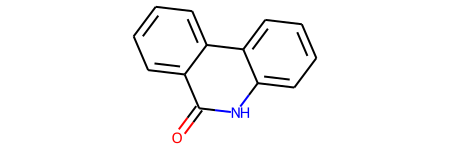

In [ ]:
Chem.MolFromSmiles("O=c1[nH]c2ccccc2c2ccccc12")

In [24]:
# train_df, valid_df = generateMurcoScaffold("BBBP")
# print(valid_df)

In [ ]:
# pd.get_option("display.max_rows")
# train_df['MurckoScaffold']
# from IPython.display import display


# pd.options.display.max_columns = None
# display(train_df['MurckoScaffold'])

In [ ]:
# train_df, valid_df = generateMurcoScaffold("BBBP")

RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not r

In [12]:
# train_df, valid_df = generateMurcoScaffold("BBBP")
# train_scaff = train_df["MurckoScaffold"]
# valid_scaff = valid_df["MurckoScaffold"]
# len(set(train_scaff)), len(set(valid_scaff)), len(train_df), len(valid_df)

In [ ]:
train_df, valid_df = generateMurcoScaffold("BACE")

In [23]:
# train_df, valid_df = generateMurcoScaffold("BACE")
# train_scaff = train_df["MurckoScaffold"]
# valid_scaff = valid_df["MurckoScaffold"]
# len(set(train_scaff)), len(set(valid_scaff)), len(train_df), len(valid_df)

In [ ]:
len(set(list(set(train_scaff)) + list(set(valid_scaff))))

519

In [13]:
# pandas.set_option('display.max_rows', None)


In [14]:
# train_df, valid_df = generateMurcoScaffold("HIV")
# train_scaff = train_df["MurckoScaffold"]
# valid_scaff = valid_df["MurckoScaffold"]
# len(set(train_scaff)), len(set(valid_scaff)), len(train_df), len(valid_df)

In [22]:
# dataset_name = "BBBP"

# def generateRecapDecompose(dataset_name):
        
#     path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/{dataset_name}/"
#     train_df = pd.read_csv(f"{path}train_{dataset_name}.csv")
#     valid_df = pd.read_csv(f"{path}valid_{dataset_name}.csv")
#     test_df = pd.read_csv(f"{path}test_{dataset_name}.csv")

#     train_scaff = []
#     valid_scaff = []
#     train_scaff = []

#     include_chirality = False

#     for i in range(len(train_df)):
#             mol = Chem.MolFromSmiles(train_df['ids'][i])
#             train_scaff.append(RecapDecompose(mol=mol))
#     train_df["RecapDecompose"] = train_scaff



#     for i in range(len(valid_df)):
#             mol = Chem.MolFromSmiles(valid_df['ids'][i])
#             valid_scaff.append(RecapDecompose(mol=mol))
#     valid_df["RecapDecompose"] = valid_scaff

#     return train_df, valid_df


In [15]:
# train_df, valid_df = generateRecapDecompose("BBBP")
# train_scaff = train_df["RecapDecompose"]
# valid_scaff = valid_df["RecapDecompose"]
# len(set(train_scaff)), len(set(valid_scaff)), len(train_df), len(valid_df)

In [16]:
# Chem.MolFromSmiles("C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl")

In [17]:
# mol = Chem.MolFromSmiles("C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl")
# a = RecapDecompose(mol=mol)

In [18]:
# from rdkit.Chem.Recap import RecapDecompose

In [19]:
# a.children

In [20]:
# Chem.MolFromSmiles("C(C)(C)C")


In [21]:
# mol